In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

In [28]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
# import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
# import sousvide.visualize.plot_learning as pl
# import sousvide.flight.deploy_figs as df

/home/admin/anaconda3/envs/kitchen/lib/python3.10/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.1'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [3]:
cohort = "experimental_forces"      # cohort name

# method = "sampling_beta"            # method name
method = "full_pert_nominal"        # method name

scene = "backroom"             # scene name

course = [                    # course names
    "line",
    "hover",
    "infinity"
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    "Iceman",                       # sifs_testbed
    "Rooster",                      # sift_testbed
    # "hsDavion",                     # sifu_testbed
    # "hsSteiner",                    # sifs_testbed
    # "hsKurita",                     # sift_testbed
    ]

Neps_hN = 100                       # histNet number of epochs 
Neps_cN = 200                       # commNet number of epochs

Only 3 samples available in trajectories000.pt. Showing all samples.


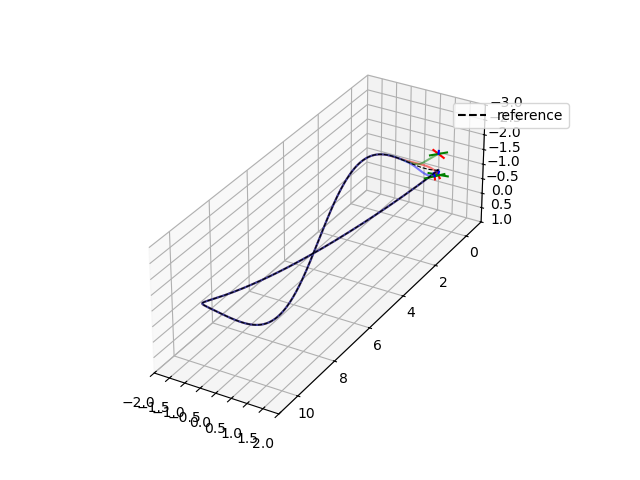

KeyError: 'course'

In [33]:
# # Generate Rollouts
# rg.generate_rollout_data(cohort,course,scene,method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [5]:
# # Train the History Network
tp.train_roster(cohort,roster,"histNet",Neps_hN,regen_data=True)
# # tp.train_roster(cohort,roster,"histNet",Neps_hN,regen_data=False)

# # Review Losses
# pl.plot_losses(cohort,roster,"histNet")

Regenerating observation data...

Generating observation data with subsample ratio 1.0 for...
 Cohort: experimental_forces
 Roster: ['Maverick', 'Iceman', 'Rooster']
 Courses: ['infinity', 'hover', 'line']

Output()

KeyError: 'metric'

In [ ]:
# Train the Command Network
tp.train_roster(cohort,roster,"commNet",Neps_hN,regen_data=True)
# tp.train_roster(cohort,roster,"histNet",Neps_hN,regen_data=False)

# # Review Losses
# pl.plot_losses(cohort,roster,"commNet")

In [ ]:
from rich.progress import Progress, SpinnerColumn, BarColumn, TextColumn
import time

# Example scene and course names
scene_name = "Mountain Valley"
course_name = "Advanced Navigation"

# Format the task description
task_description = f"[bold cyan]Scene:[/] {scene_name} | [bold magenta]Course:[/] {course_name}"

# Initialize progress bar
with Progress(
    SpinnerColumn(),
    TextColumn("[bold blue]{task.description}"),
    BarColumn(),
    TextColumn("[bold]{task.percentage:>3.0f}%"),
) as progress:

    # Add a task with scene & course name in the description
    task_id = progress.add_task(task_description, total=10)

    # Simulate progress
    for _ in range(10):
        time.sleep(0.5)
        progress.update(task_id, advance=1)

print("Processing complete!")